## Mock - Up Credit Scoring Model

## 1. Genratation of Synthetic Data.

There are several ways to generate realistic synthetic data:

**A. Rule-Based (Manual Simulation)**
- ✅ Best for: When there is already have well-defined feature distributions (like the credit score bins).

   ✅ **How it works:**

1. I define ranges for each variable (e.g., income, debt-to-income ratio, farm size).
2. Then randomly generate values based on those constraints.

**B. Generative Models (GANs, Variational Autoencoders)**
 - ✅ Best for: Generating highly realistic synthetic data with complex relationships.
 - ❌ Downside: Requires more computational power and deep learning knowledge.
 
  ✅**How it works:**

1. Train a GAN (Generative Adversarial Network) or Variational Autoencoder (VAE) on real data.
2. The model learns hidden patterns and generates synthetic user profiles.

In [1]:
# Importation of necessary libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualizations
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Number of Samples to be used
 
n = 100

In [3]:
np.random.seed(0)#To enhance reproducibility

In [4]:
# 1. Farmer's Profile.  weighting = (21.06%)

age = np.random.randint(18,70,n)
marital_status = np.random.choice(["Single","Married","Divorced","Widowed"],n)
education_level = np.random.choice(["None","Primary","Secondary","Higher Education"],n)
Farming_experience = np.random.randint(0,50,n)
Sacco_Membership = np.random.choice(["Yes","No"], n , p = [0.6,0.4])
Years_in__active_Sacco_Contributions = np.random.randint(0,7,n)


In [5]:
# 2. Financial Information. Weighting = (25%)

annual_income = np.random.randint(10000, 2000000, n)
loan_amount = np.random.randint(50000, 5000000, n)
loan_to_income_ratio = loan_amount / annual_income
debt_to_income_ratio = np.random.uniform(0.1, 1.0, n)
savings_contributions = np.random.randint(1000, 200000,n)
savings_to_income_ratio = savings_contributions / annual_income

In [6]:
# 3.Loan Details. Weighting -(10%)

loan_purpose = np.random.choice(["Farm Expansion", "Machinery Purchase", "Farm Inputs", "Labor costs", "Harvesting Costs","Debt_consolidation","Personal Use"], n , p = [0.23,0.2,0.11,0.09,0.15,0.12,0.1])


In [7]:
# 4.Credit History. Weighting -(10%)

repayment_history = np.random.choice(["Good", "Fair", "Poor"], n, p=[0.6, 0.3, 0.1])

In [8]:
# 5.Behavioural Information - Weighting=(7.89%)

sacco_contribution_frequency = np.random.choice(["Monthly", "Quarterly", "Semi-Annually", "Annually"], n)
timeliness_of_contributions = np.random.choice(["On-time", "Delayed"], n, p=[0.8, 0.2])
borrower_requested_adjustments = np.random.choice(["Yes", "No"], n, p=[0.3, 0.7])

In [9]:
# 6. External Factors - Weighting = (5.53%)

weather_risks = np.random.choice(["High", "Moderate", "Low"], n)
pest_outbreaks = np.random.choice(["Yes", "No"], n, p=[0.5, 0.5])
inflation_rate = np.random.uniform(3,7, n)

In [10]:
# 7. Farm-Specific Data - Weighting (28.96%)

farm_size = np.random.randint(1, 100, n)
crop_type = np.random.choice(["HA - Tomatoes/Dry_Onions/Cabbages/Watermelon", "HB-Apples/Mangoes/Oranges/Garlic", "HC-Kales/Grapes", "NHA - DryMaize/Wheat/IrishPotatoes","NHB - DryPeas/Rice","Livestock- Dairy/Poultry", "Others"], n)
crop_diversification = np.random.choice(["Yes", "No"], n, p=[0.6, 0.4])
irrigation_access = np.random.choice(["Seasonal", "No_Irrigation"], n, p=[0.5, 0.5])
annual_yield = np.random.randint(1, 100, n)
historical_yield_trends = np.random.choice(["Increasing", "Decreasing", "Stable"], n)
soil_quality = np.random.choice(["Good", "Moderate", "Poor"], n, p=[0.5, 0.3, 0.2])
livestock_ownership = np.random.choice(["Yes", "No"], n, p=[0.6, 0.4])
use_of_technology = np.random.choice(["High", "Medium", "Low"], n)
farm_input_usage = np.random.choice(["Organic", "Chemical", "Mixed"], n)


In [11]:

# 8. Market Data - Weighting (6.32%)

average_selling_price = np.random.randint(50, 500, n)
contracts_with_buyers = np.random.choice(["Yes", "No"], n, p=[0.7, 0.3])
storage_availability = np.random.choice(["Yes", "No"], n, p=[0.5, 0.5])


In [12]:
# Creation of the DataFrame

df_synthetic = pd.DataFrame({
    "Age": age,
    "Education Level": education_level,
    "SACCO Membership": Sacco_Membership,
    "Farming Experience": Farming_experience,
    "Marital Status": marital_status,
    
    "Annual Income": annual_income,
    "Loan Amount": loan_amount,
    "Loan-To-Income Ratio": loan_to_income_ratio,
    "Debt-To-Income Ratio": debt_to_income_ratio,
    "Repayment History": repayment_history,
    "Savings Contributions": savings_contributions,
    "Savings-To-Income Ratio": savings_to_income_ratio,

    "Loan Purpose": loan_purpose,
    
    "SACCO Contribution Frequency": sacco_contribution_frequency,
    "Timeliness of Contributions": timeliness_of_contributions,
    "Borrower-Requested Loan Adjustments": borrower_requested_adjustments,

    "Weather Risks": weather_risks,
    "Pest Outbreaks": pest_outbreaks,
    "Inflation Rate": inflation_rate,

    "Farm Size": farm_size,
    "Crop Type": crop_type,
    "Crop Diversification": crop_diversification,
    "Irrigation Access": irrigation_access,
    "Annual Yield": annual_yield,
    "Historical Yield Trends": historical_yield_trends,
    "Soil Quality": soil_quality,
    "Livestock Ownership": livestock_ownership,
    "Use of Technology": use_of_technology,
    "Farm Input Usage": farm_input_usage,

    "Average Selling Price": average_selling_price,
    "Contracts with Buyers": contracts_with_buyers,
    "Storage Availability": storage_availability,
})


In [13]:
csv_path = r"C:\Users\Admin\Credit--Scoring\DF\df_synthetic.csv"



In [ ]:
df_synthetic.to_csv(csv_path, index=False)



## 2. INTIAL DATA EXPLORATION
- Here we try to understand the synthetic data that we have genrated.

In [15]:
df_synthetic.head()

,Age,Education Level,SACCO Membership,Farming Experience,Marital Status,Annual Income,Loan Amount,Loan-To-Income Ratio,Debt-To-Income Ratio,Repayment History,...,Irrigation Access,Annual Yield,Historical Yield Trends,Soil Quality,Livestock Ownership,Use of Technology,Farm Input Usage,Average Selling Price,Contracts with Buyers,Storage Availability
0,62,None,Yes,23,Widowed,50621,4853717,95.883467,0.559566,Good,...,Seasonal,7,Stable,Moderate,Yes,Medium,Chemical,233,Yes,Yes
1,65,None,No,3,Married,713733,4765195,6.676439,0.448144,Fair,...,Seasonal,59,Stable,Good,Yes,Medium,Chemical,160,No,No
2,18,Higher Education,Yes,46,Married,474286,1873171,3.949455,0.577080,Good,...,Seasonal,86,Stable,Moderate,Yes,High,Organic,424,Yes,No
3,21,Primary,No,26,Married,1301791,1170394,0.899064,0.950237,Good,...,No_Irrigation,4,Decreasing,Moderate,Yes,Medium,Organic,370,Yes,Yes
4,21,Higher Education,No,44,Single,843705,51337,0.060847,0.903576,Fair,...,No_Irrigation,76,Stable,Good,Yes,High,Organic,407,Yes,Yes


In [16]:
df_synthetic.describe()

,Age,Farming Experience,Annual Income,Loan Amount,Loan-To-Income Ratio,Debt-To-Income Ratio,Savings Contributions,Savings-To-Income Ratio,Inflation Rate,Farm Size,Annual Yield,Average Selling Price
count,100.000000,100.00000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,41.570000,25.28000,9.548158e+05,2.348931e+06,5.435106,0.561740,99540.940000,0.212709,5.116451,43.220000,47.340000,286.250000
std,15.537023,14.13076,5.315207e+05,1.481936e+06,11.678954,0.245051,56952.016082,0.369589,1.190172,29.547626,28.910597,124.380272
min,18.000000,0.00000,3.384200e+04,5.133700e+04,0.053586,0.102790,2291.000000,0.001387,3.057006,1.000000,3.000000,52.000000
25%,29.000000,15.00000,4.824392e+05,1.169644e+06,1.048619,0.383211,50726.750000,0.058727,4.169951,17.500000,21.250000,185.000000
50%,41.000000,27.00000,9.275505e+05,2.101148e+06,2.462171,0.573893,100145.000000,0.106781,5.212487,43.000000,47.000000,281.500000
75%,55.250000,36.00000,1.378674e+06,3.574263e+06,4.958690,0.713616,148688.500000,0.211201,6.099123,68.500000,76.000000,407.500000
max,69.000000,49.00000,1.976180e+06,4.956201e+06,95.883467,0.992027,196505.000000,2.531348,6.984285,99.000000,98.000000,498.000000


In [17]:
# Shape of the dataset
print("Dataset Shape:", df_synthetic.shape)


# Column names and types
print(df_synthetic.info())

# Check for missing values
print(df_synthetic.isnull().sum())


Dataset Shape: (100, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  100 non-null    int32  
 1   Education Level                      100 non-null    object 
 2   SACCO Membership                     100 non-null    object 
 3   Farming Experience                   100 non-null    int32  
 4   Marital Status                       100 non-null    object 
 5   Annual Income                        100 non-null    int32  
 6   Loan Amount                          100 non-null    int32  
 7   Loan-To-Income Ratio                 100 non-null    float64
 8   Debt-To-Income Ratio                 100 non-null    float64
 9   Repayment History                    100 non-null    object 
 10  Savings Contributions                100 non-null    int32  
 11  Savings-

### 1. Initial Observations
- Dataset Size: **100 rows, 32 columns** – relatively small but detailed.

### Feature Types:

- **Numerical (12 columns)**: Includes Age, Annual Income, Loan Amount, Inflation Rate, Farm Size, etc.
- **Categorical (20 columns)**: Includes Education Level, SACCO Membership, Marital Status, etc.
- **No Missing Values**: Every column has 100 non-null values, meaning no missing data handling is required.

### Potentially Important Features:

- **Financial Indicators:** Loan-To-Income Ratio, Debt-To-Income Ratio, Savings Contributions
- **Farming-Related Factors:** Farm Size, Crop Type, Soil Quality
- **Risk Factors:** Weather Risks, Pest Outbreaks, Inflation Rate
- **Behavioral Patterns:** Repayment History, Timeliness of Contributions, SACCO Membership

## 3.Explarotary Data Analysis

### 3.1 Univariate Analysis

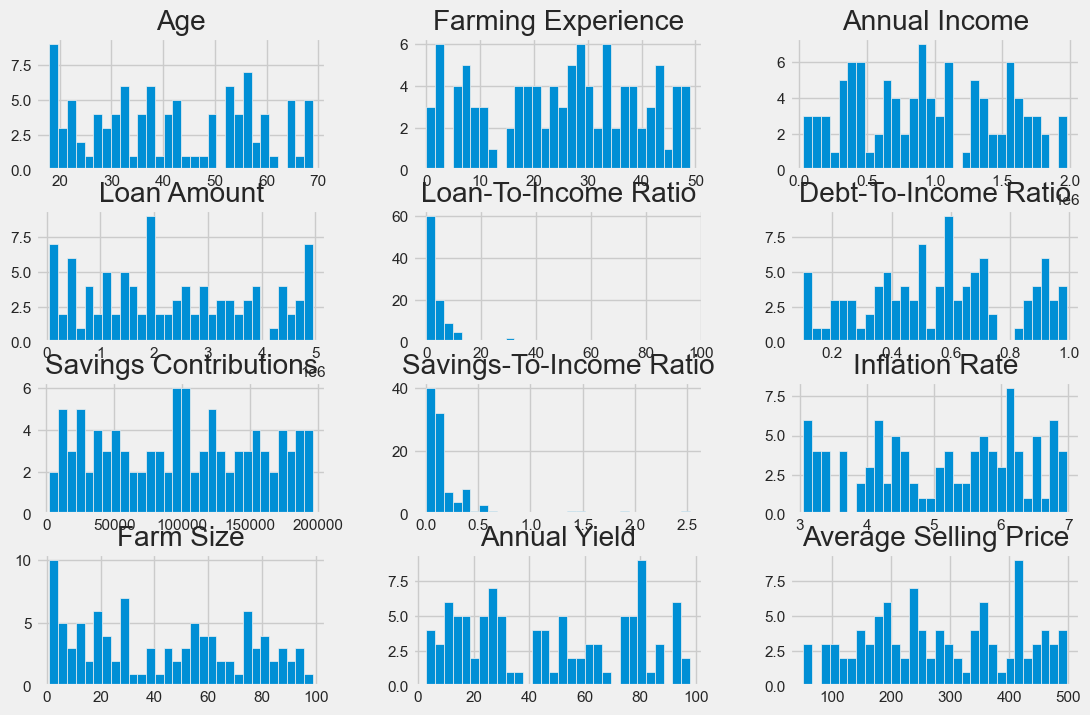

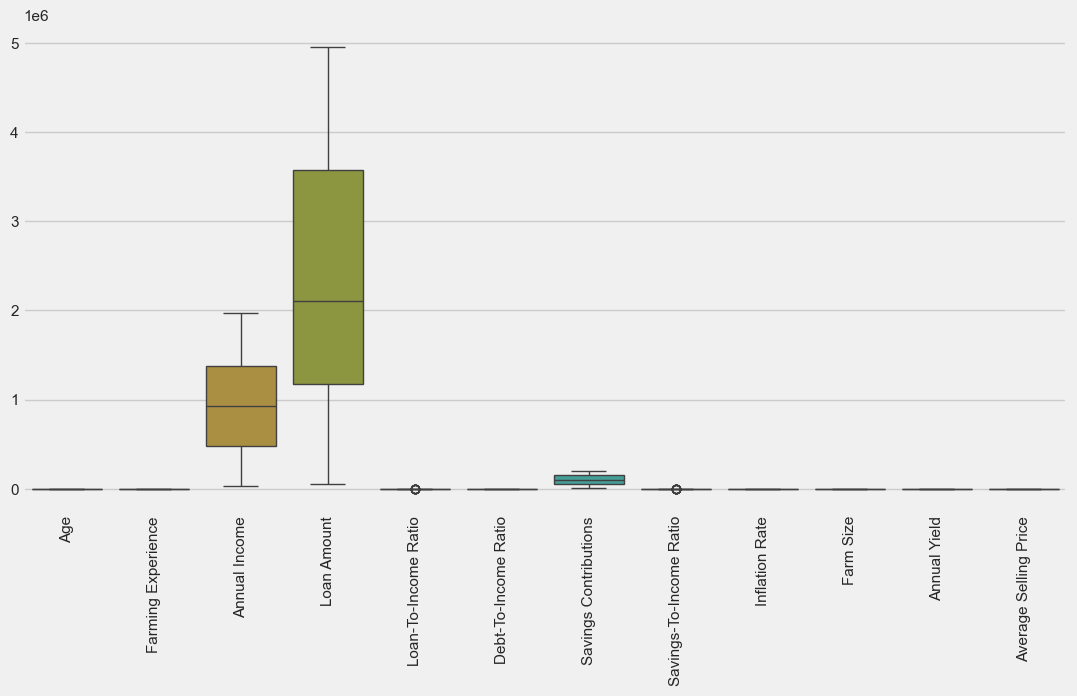

In [18]:
# Histograms for numerical columns
df_synthetic.hist(figsize=(12, 8), bins=30)
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_synthetic)
plt.xticks(rotation=90)
plt.show()

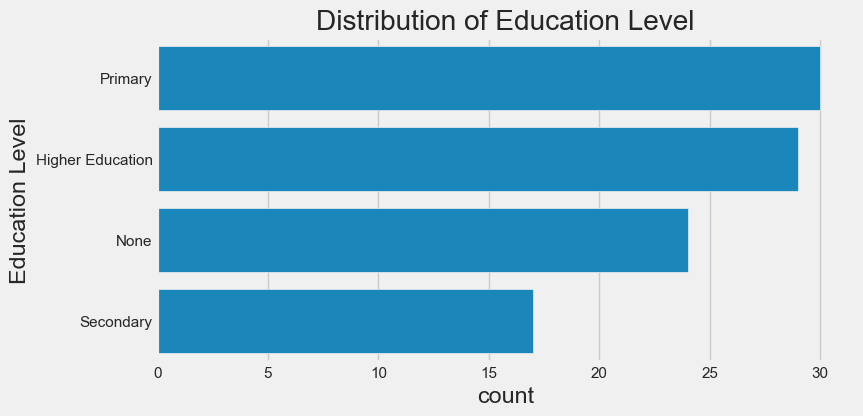

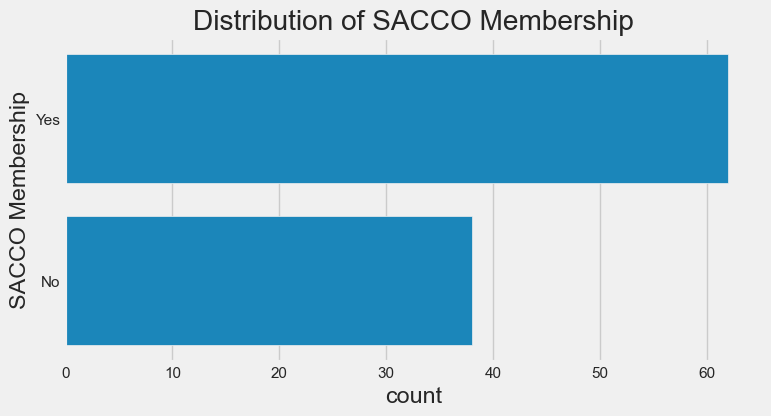

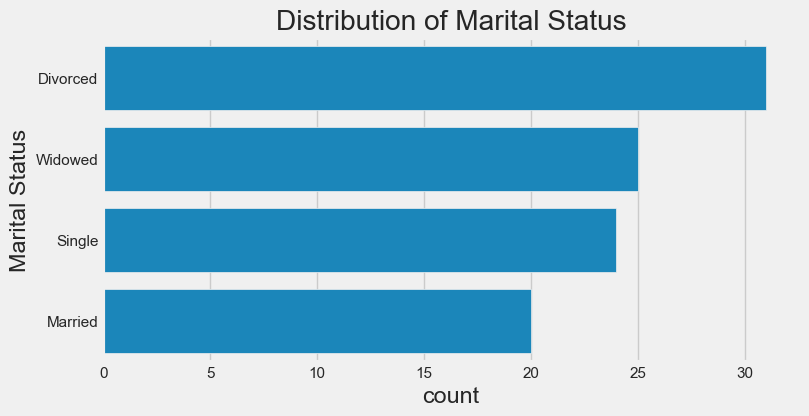

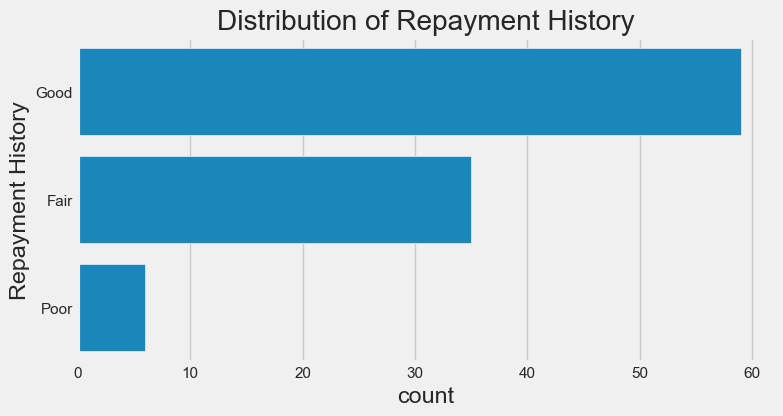

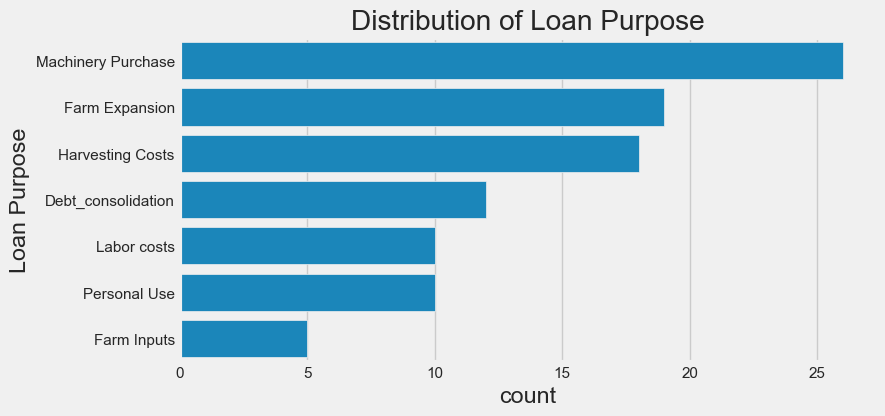

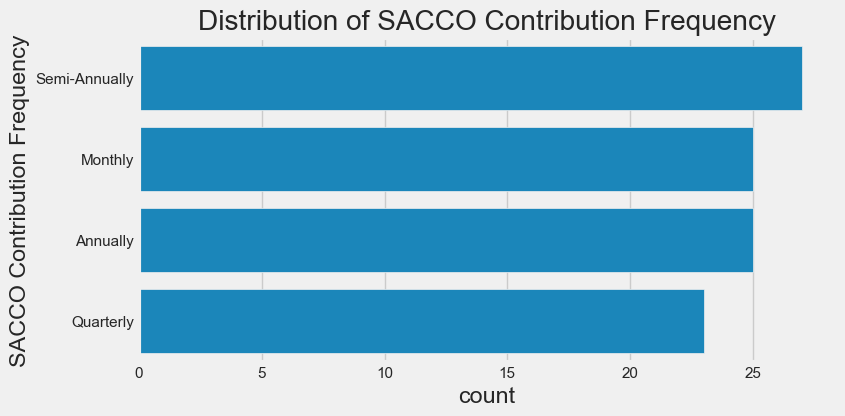

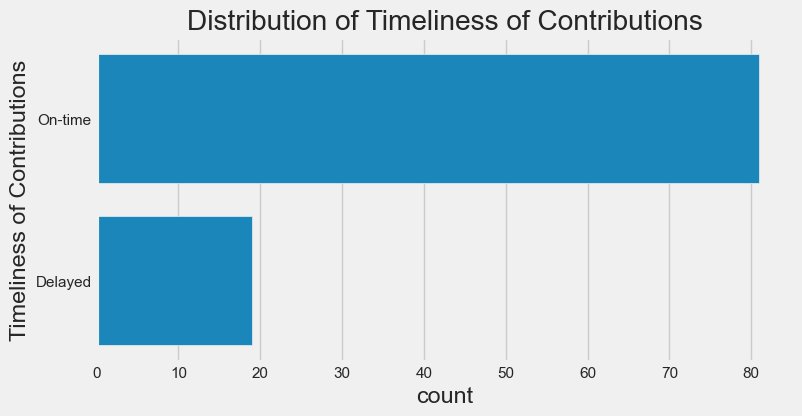

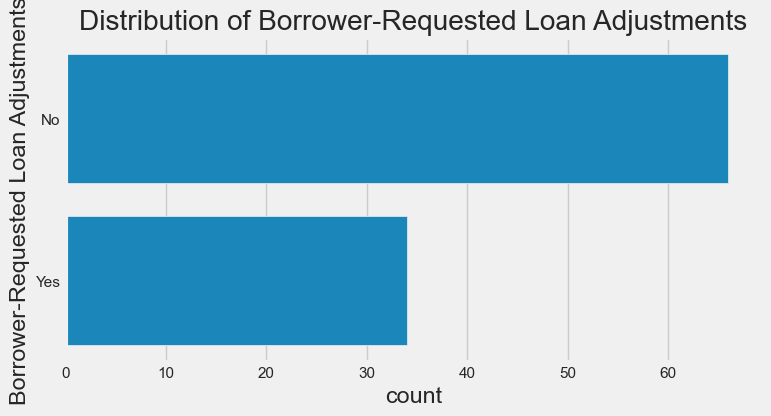

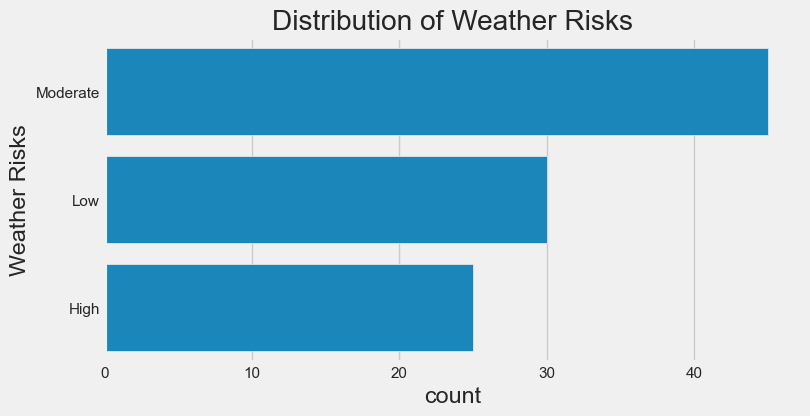

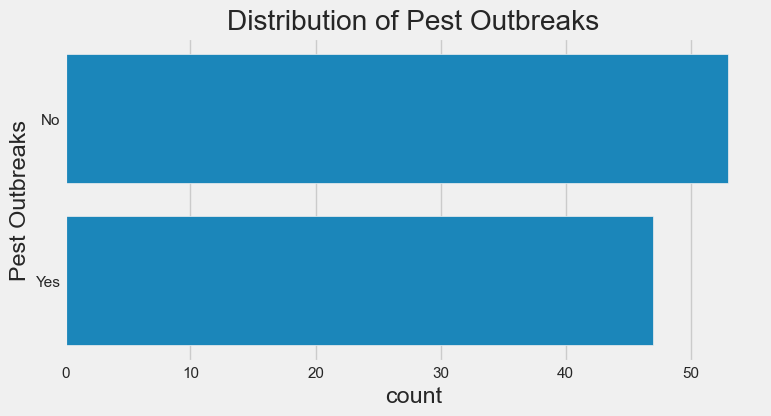

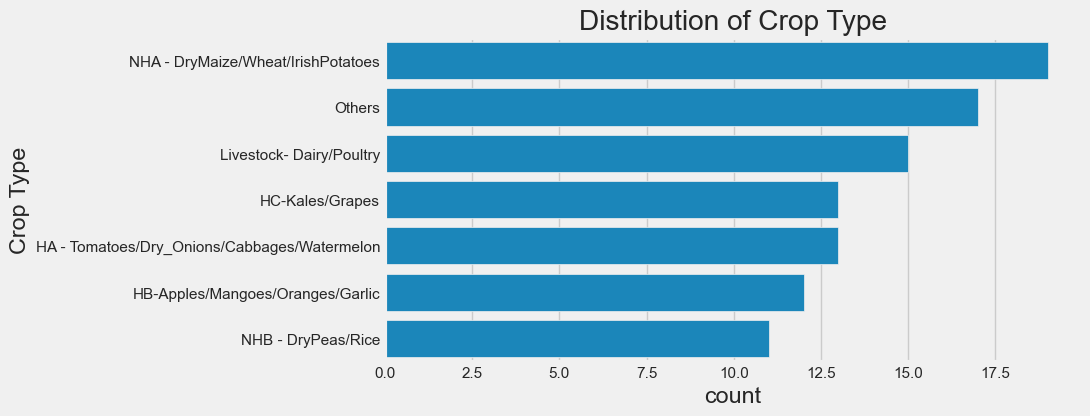

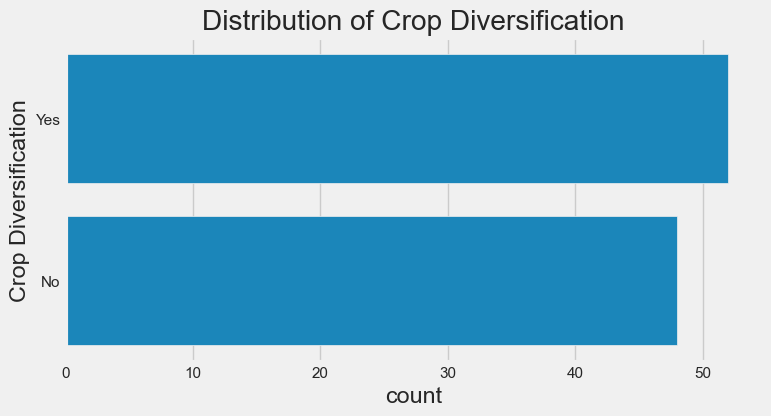

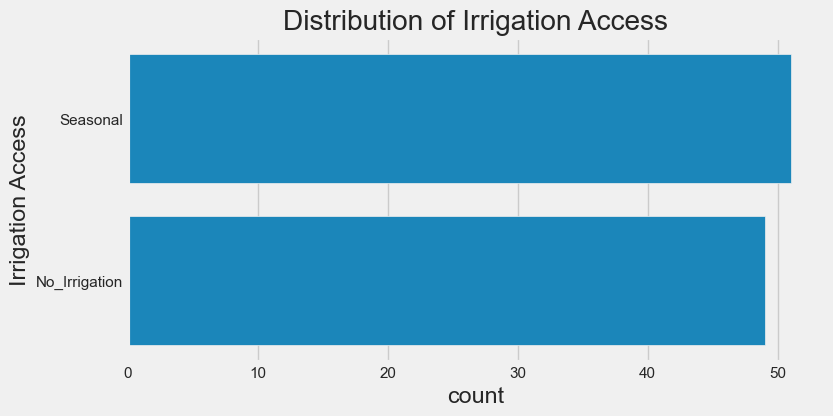

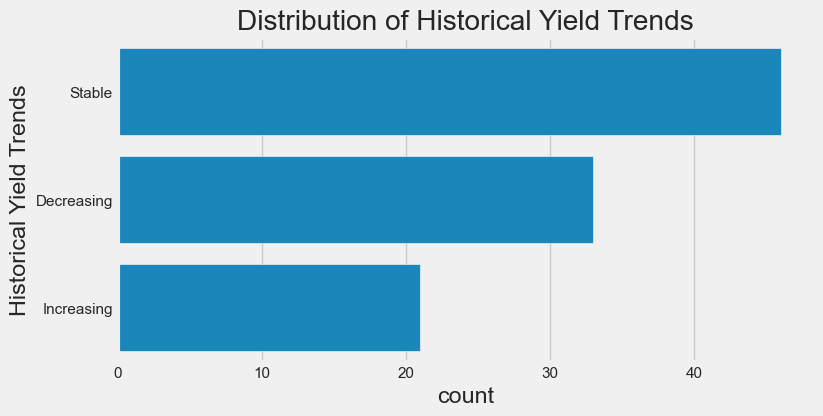

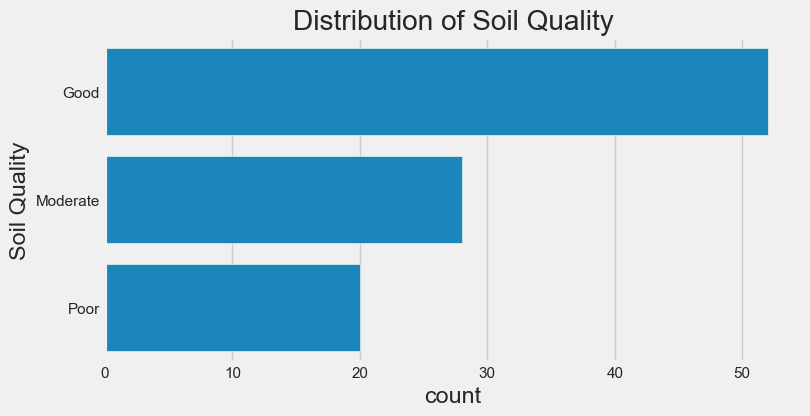

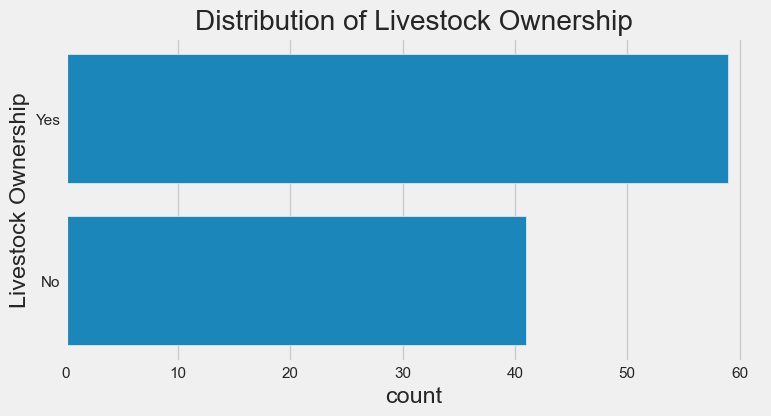

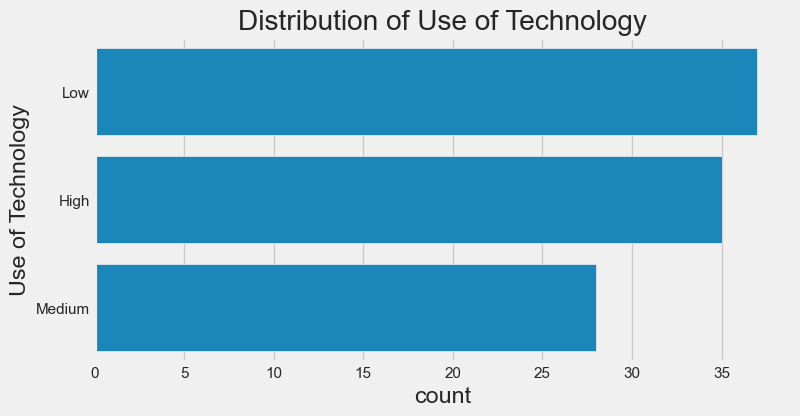

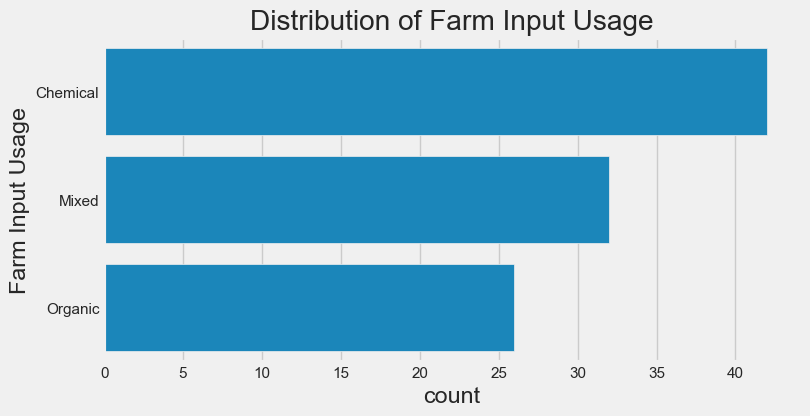

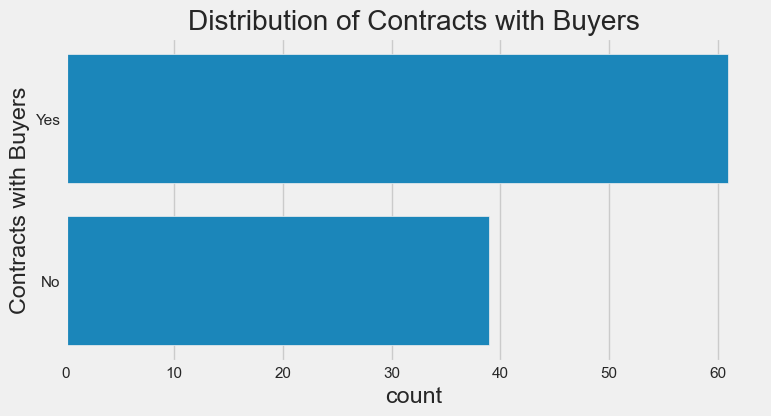

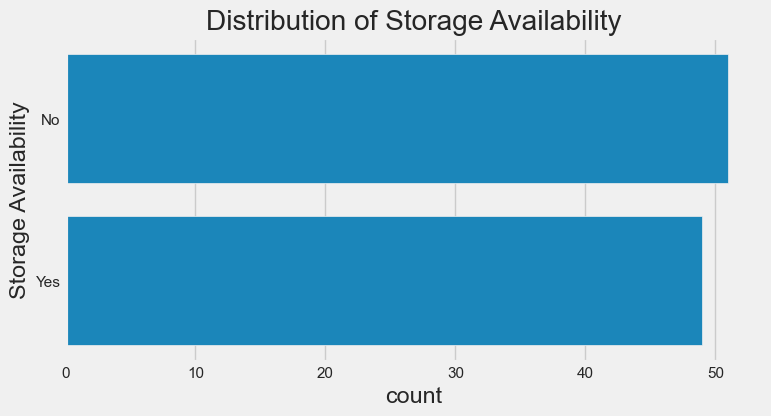

In [19]:
categorical_cols = df_synthetic.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df_synthetic[col], order=df_synthetic[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()


## 3.2️ Bivariate Analysis (Feature Relationships)
- We need to check how features relate to each other.

- Correlation Between Numerical Features.

  **Task:** Identify highly correlated features.

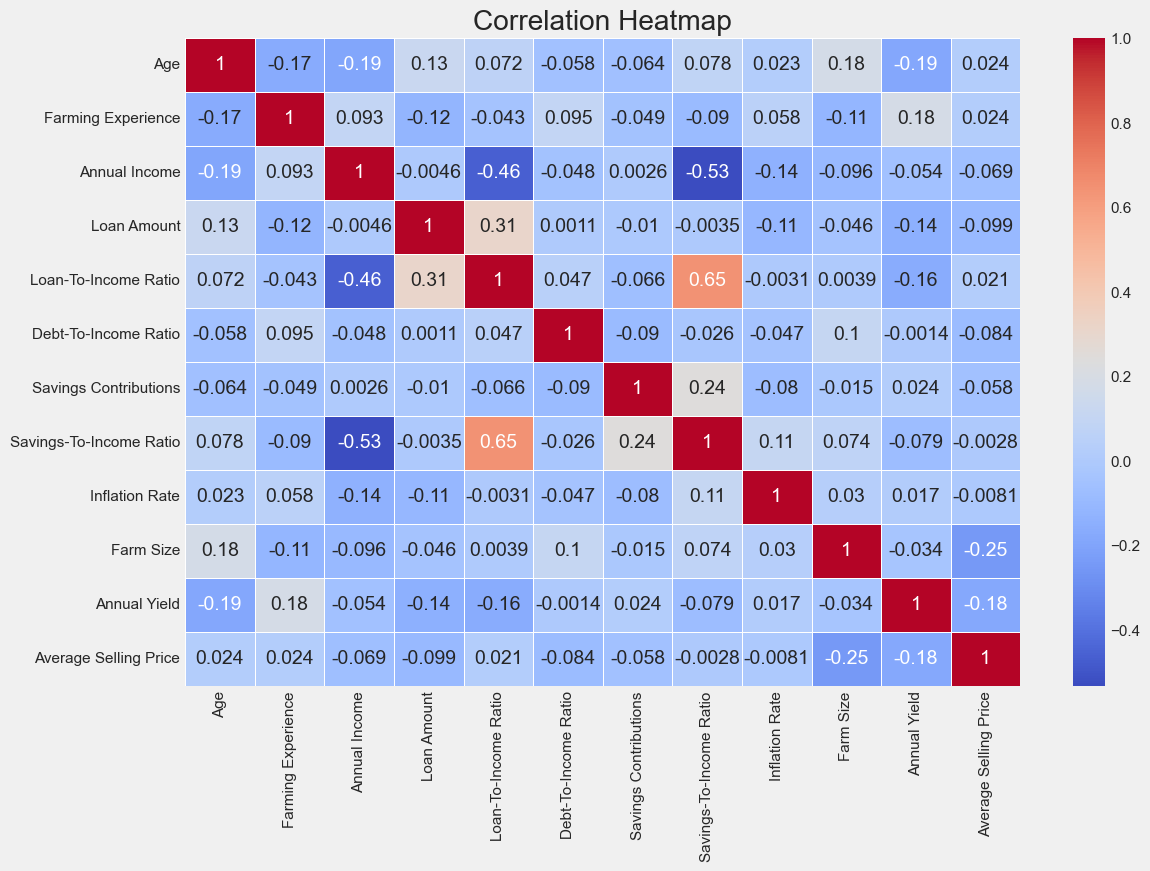

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_synthetic.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


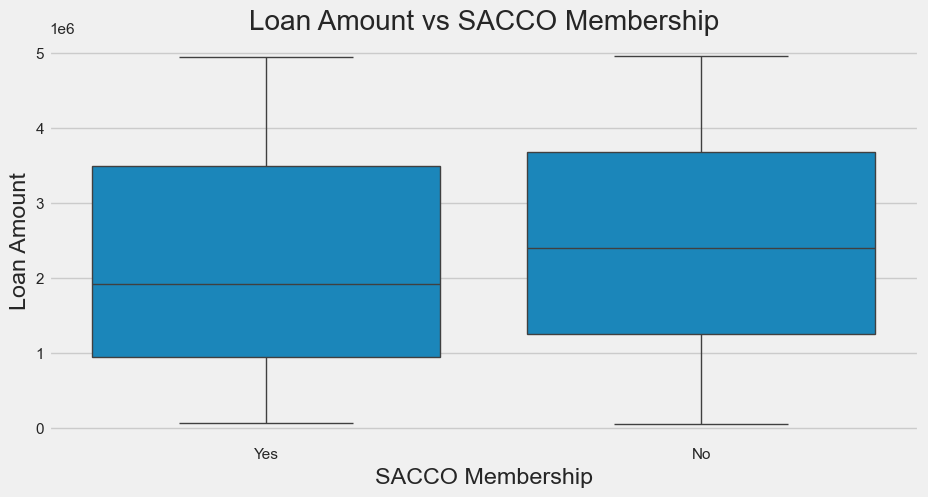

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_synthetic["SACCO Membership"], y=df_synthetic["Loan Amount"])
plt.title("Loan Amount vs SACCO Membership")
plt.show()


### . Observations
- The Loan-to-Income Ratio and Savings-to-Income Ratio show strong correlations 
- **Annual Income** and **Loan Amount** need scaling and possible transformation.
- **Farming Experience** and **Age might** provide non-linear insights.